## Portfolio Optimisation - finding the efficient frontier (PART 1)

### 1. Load packages

In [11]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load Data

In [54]:
test = data.DataReader(['GOOG', 'TSLA'], 'yahoo', start='2018/01/01', end='2020/12/01')
test.head()

Attributes    Adj Close                   Close                    High  \
Symbols            GOOG       TSLA         GOOG       TSLA         GOOG   
Date                                                                      
2018-01-02  1065.000000  64.106003  1065.000000  64.106003  1066.939941   
2018-01-03  1082.479980  63.450001  1082.479980  63.450001  1086.290039   
2018-01-04  1086.400024  62.924000  1086.400024  62.924000  1093.569946   
2018-01-05  1102.229980  63.316002  1102.229980  63.316002  1104.250000   
2018-01-08  1106.939941  67.281998  1106.939941  67.281998  1111.270020   

Attributes                     Low                    Open             \
Symbols          TSLA         GOOG       TSLA         GOOG       TSLA   
Date                                                                    
2018-01-02  64.421997  1045.229980  62.200001  1048.339966  62.400002   
2018-01-03  65.050003  1063.209961  63.110001  1064.310059  64.199997   
2018-01-04  63.709999  1084.001953  61.136002  1088.000000  62.574001   
2018-01-05  63.448002  1092.000000  62.400002  1094.000000  63.324001   
2018-01-08  67.403999  1101.619995  63.099998  1102.229980  63.200001   

Attributes     Volume              
Symbols          GOOG        TSLA  
Date                               
2018-01-02  1237600.0  21761000.0  
2018-01-03  1430200.0  22607500.0  
2018-01-04  1004600.0  49731500.0  
2018-01-05  1279100.0  22956000.0  
2018-01-08  1047600.0  49297000.0

In [53]:
#isolate Adj Close field only

test = test['Adj Close']
test.head()

Symbols,GOOG,TSLA,BABA,QQQ,FB
Date,,,,,
2018-01-02,1065.000000,64.106003,183.649994,154.995071,181.419998
2018-01-03,1082.479980,63.450001,184.000000,156.501114,184.669998
2018-01-04,1086.400024,62.924000,185.710007,156.774933,184.330002
2018-01-05,1102.229980,63.316002,190.699997,158.349411,186.850006
2018-01-08,1106.939941,67.281998,190.330002,158.965546,188.279999


### 3. Calculate the percentage change in stock prices everyday - take the log

#### 3.1 TSLA

In [39]:
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
Name: TSLA, dtype: float64

#### 3.2 GOOG

In [22]:
goog = test['GOOG'].pct_change().apply(lambda x: np.log(1+x))
goog.head()

Date
2018-01-02         NaN
2018-01-03    0.016280
2018-01-04    0.003615
2018-01-05    0.014466
2018-01-08    0.004264
Name: GOOG, dtype: float64

### 4. Calculate Variance

#### 4.1 TSLA

In [26]:
var_tesla = tesla.var()
var_tesla

0.001851402299329446

#### 4.2 GOOG

In [27]:
var_goog = goog.var()
var_goog

0.0003852787207186428

### 5. Calculate Standard Deviation - 250 trading days a year

#### 5.1 TSLA

In [32]:
tesla_vol = np.sqrt(var_tesla * 250)

#### 5.2 GOOG

In [33]:
goog_vol = np.sqrt(var_goog * 250)

### 6. Plot risk

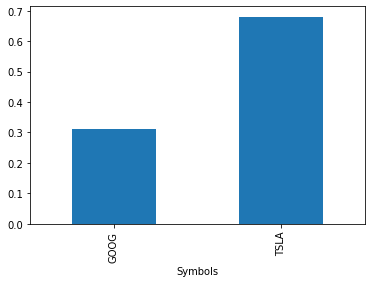

In [40]:
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

### 7. Calculate co-variance

In [42]:
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,GOOG,TSLA
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.016280,-0.010286
2018-01-04,0.003615,-0.008325
2018-01-05,0.014466,0.006210
2018-01-08,0.004264,0.060755


In [45]:
test1['TSLA'].cov(test1['GOOG'])

0.00033545385003572577

### 8. Calculate correlation

In [46]:
test1['TSLA'].corr(test1['GOOG'])

0.39718685748660476

### 9. Expected returns

In [47]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,GOOG,TSLA
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.016280,-0.010286
2018-01-04,0.003615,-0.008325
2018-01-05,0.014466,0.006210
2018-01-08,0.004264,0.060755


### 10. Calculate weights - depends on the investor's weighting of each stock

In [48]:
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

Symbols
GOOG    0.000714
TSLA    0.003012
dtype: float64

In [50]:
#expected returns

e_r = (e_r_ind*w).sum()
e_r

0.0025521552599847824